# Classifying Mushrooms

In [1]:
#Import libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load Dataset

In [2]:
#Import dataset 

dataset = pd.read_csv("desktop/mltextfile/mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Checking dataset shape

dataset.shape

(8124, 23)

# Data Handling 

In [4]:
#checking for nulls value 

dataset.isnull().sum() 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#breakdown datatype 

dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Description of the dataset

dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#From the description of this dataset, it shows that there's no null value and they are categorical values with object datatype 

## Handling Categorical Values 

In [7]:
#extracting 'class' from categorical to numerical values

class_ = pd.get_dummies(dataset["class"], prefix='class',drop_first=True)
class_ 

,class_p
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [8]:
#concatenate extracted 'class ' features into initial data frame

dataset = pd.concat([dataset,class_], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_p
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0


In [9]:
#extracting 'cap-shape' from categorical to numerical values

cap_shape = pd.get_dummies(dataset["cap-shape"], prefix='cap-shape',drop_first=True)
cap_shape

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
8119,0,0,1,0,0
8120,0,0,0,0,1
8121,0,1,0,0,0
8122,0,0,1,0,0


In [10]:
#concatenate extracted 'cap-shape' features into initial data frame

dataset = pd.concat([dataset,cap_shape], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,ring-type,spore-print-color,population,habitat,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,p,x,s,n,t,p,f,c,n,k,...,p,k,s,u,1,0,0,0,0,1
1,e,x,s,y,t,a,f,c,b,k,...,p,n,n,g,0,0,0,0,0,1
2,e,b,s,w,t,l,f,c,b,n,...,p,n,n,m,0,0,0,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,p,k,s,u,1,0,0,0,0,1
4,e,x,s,g,f,n,f,w,b,k,...,e,n,a,g,0,0,0,0,0,1


In [11]:
#extracting 'cap-surface' from categorical to numerical values

cap_surface = pd.get_dummies(dataset["cap-surface"], prefix='cap-surface',drop_first=True)
cap_surface

,cap-surface_g,cap-surface_s,cap-surface_y
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
8119,0,1,0
8120,0,1,0
8121,0,1,0
8122,0,0,1


In [12]:
#concatenate extracted 'cap-surface' features into initial data frame

dataset = pd.concat([dataset,cap_surface], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,habitat,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y
0,p,x,s,n,t,p,f,c,n,k,...,u,1,0,0,0,0,1,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,g,0,0,0,0,0,1,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,m,0,0,0,0,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,u,1,0,0,0,0,1,0,0,1
4,e,x,s,g,f,n,f,w,b,k,...,g,0,0,0,0,0,1,0,1,0


In [13]:
#extracting 'cap-color' from categorical to numerical values

cap_color = pd.get_dummies(dataset["cap-color"], prefix='cap-color',drop_first=True)
cap_color


,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,0
8122,0,0,0,1,0,0,0,0,0


In [14]:
#concatenate extracted 'cap-color' features into initial data frame

dataset = pd.concat([dataset,cap_color], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,1,0,0,0,0,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,0,0,0,0,1
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,0,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,1,0,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,1,0,0,0,0,0,0


In [15]:
#extracting 'bruises' from categorical to numerical values

bruises = pd.get_dummies(dataset["bruises"], prefix='bruises',drop_first=True)
bruises


,bruises_t
0,1
1,1
2,1
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,0


In [16]:
#concatenate extracted 'bruises' features into initial data frame

dataset = pd.concat([dataset,bruises], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,1,0,0,0,0,0,1
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,0,0,0,1,1
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,0,0,0,1,0,1
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,0,0,0,1,0,1
4,e,x,s,g,f,n,f,w,b,k,...,0,0,1,0,0,0,0,0,0,0


In [17]:
#extracting 'odor' from categorical to numerical values

odor = pd.get_dummies(dataset["odor"], prefix='odor',drop_first=True)
odor

,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0
8120,0,0,0,0,1,0,0,0
8121,0,0,0,0,1,0,0,0
8122,0,0,0,0,0,0,0,1


In [18]:
#concatenate extracted 'odor' features into initial data frame

dataset = pd.concat([dataset,odor], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,p,x,s,n,t,p,f,c,n,k,...,0,1,0,0,0,0,0,1,0,0
1,e,x,s,y,t,a,f,c,b,k,...,1,1,0,0,0,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,1,0,0,1,0,0,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,1,0,0,0,0,0,1,0,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,0,0,1,0,0,0


In [19]:
#extracting 'gill-attachment' from categorical to numerical values

gill_attachment = pd.get_dummies(dataset["gill-attachment"], prefix='gill-attachment',drop_first=True)
gill_attachment 


,gill-attachment_f
0,1
1,1
2,1
3,1
4,1
...,...
8119,0
8120,0
8121,0
8122,1


In [20]:
#concatenate extracted 'gill_attachment' features into initial data frame

dataset = pd.concat([dataset,gill_attachment], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f
0,p,x,s,n,t,p,f,c,n,k,...,1,0,0,0,0,0,1,0,0,1
1,e,x,s,y,t,a,f,c,b,k,...,1,0,0,0,0,0,0,0,0,1
2,e,b,s,w,t,l,f,c,b,n,...,1,0,0,1,0,0,0,0,0,1
3,p,x,y,w,t,p,f,c,n,n,...,1,0,0,0,0,0,1,0,0,1
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,0,1,0,0,0,1


In [21]:
#extracting 'gill-spacing' from categorical to numerical values

gill_spacing = pd.get_dummies(dataset["gill-spacing"], prefix='gill-spacing',drop_first=True)
gill_spacing  


,gill-spacing_w
0,0
1,0
2,0
3,0
4,1
...,...
8119,0
8120,0
8121,0
8122,0


In [22]:
#concatenate extracted 'gill-spacing' features into initial data frame

dataset = pd.concat([dataset,gill_spacing], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,0,1,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,0,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,1,0,0,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,0,1,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,1,0,0,0,1,1


In [23]:
#extracting 'gill-size' from categorical to numerical values

gill_size = pd.get_dummies(dataset["gill-size"], prefix='gill-size',drop_first=True)
gill_size   


,gill-size_n
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [24]:
#concatenate extracted 'gill-size' features into initial data frame

dataset = pd.concat([dataset,gill_size], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,1,0,0,1,0,1
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,0,0,1,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,1,0,0,0,0,0,1,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,1,0,0,1,0,1
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,1,0,0,0,1,1,0


In [25]:
#extracting 'gill-color' from categorical to numerical values

gill_color= pd.get_dummies(dataset["gill-color"], prefix='gill-color',drop_first=True)
gill_color  

,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,1
8120,0,0,0,0,0,0,0,0,0,0,1
8121,0,0,0,0,1,0,0,0,0,0,0
8122,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#concatenate extracted 'gill-color' features into initial data frame

dataset = pd.concat([dataset,gill_color], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y
0,p,x,s,n,t,p,f,c,n,k,...,0,0,1,0,0,0,0,0,0,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,1,0,0,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,1,0,0,0,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,1,0,0,0,0,0,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#extracting 'stalk-shape' from categorical to numerical values

stalk_shape= pd.get_dummies(dataset["stalk-shape"], prefix='stalk-shape',drop_first=True)
stalk_shape 

,stalk-shape_t
0,0
1,0
2,0
3,0
4,1
...,...
8119,0
8120,0
8121,0
8122,1


In [28]:
#concatenate extracted 'stalk-shape' features into initial data frame

dataset = pd.concat([dataset,stalk_shape], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t
0,p,x,s,n,t,p,f,c,n,k,...,0,1,0,0,0,0,0,0,0,0
1,e,x,s,y,t,a,f,c,b,k,...,0,1,0,0,0,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,1,0,0,0,0,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,1,0,0,0,0,0,0,0
4,e,x,s,g,f,n,f,w,b,k,...,0,1,0,0,0,0,0,0,0,1


In [29]:
#extracting 'stalk-root' from categorical to numerical values

stalk_root= pd.get_dummies(dataset["stalk-root"], prefix='stalk-root',drop_first=True)
stalk_root 

,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
8119,0,0,0,0
8120,0,0,0,0
8121,0,0,0,0
8122,0,0,0,0


In [30]:
#concatenate extracted 'stalk-root' features into initial data frame

dataset = pd.concat([dataset,stalk_root], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,0,0,1,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,0,0,0,1,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,0,1,0,0,1,0


In [31]:
#extracting 'stalk-surface-above-ring' from categorical to numerical values

stalk_surface_above_ring= pd.get_dummies(dataset["stalk-surface-above-ring"], prefix='stalk-surface-above-ring',drop_first=True)
stalk_surface_above_ring

,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8119,0,1,0
8120,0,1,0
8121,0,1,0
8122,0,1,0


In [32]:
#concatenate extracted 'stalk-surface-above-ring' features into initial data frame
 
dataset = pd.concat([dataset,stalk_surface_above_ring], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,0,1,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,1,0,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,1,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,0,1,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,1,0,0,1,0,0,1,0


In [33]:
#extracting 'stalk-surface-below-ring' from categorical to numerical values

stalk_surface_below_ring= pd.get_dummies(dataset["stalk-surface-below-ring"], prefix='stalk-surface-below-ring',drop_first=True)
stalk_surface_below_ring

,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8119,0,1,0
8120,0,1,0
8121,0,1,0
8122,1,0,0


In [34]:
#concatenate extracted 'stalk-surface-below-ring' features into initial data frame
 
dataset = pd.concat([dataset,stalk_surface_below_ring], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y
0,p,x,s,n,t,p,f,c,n,k,...,0,0,1,0,0,1,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,1,0,0,0,1,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,0,1,0,0,0,1,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,1,0,0,1,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,1,0,0,1,0,0,1,0


In [35]:
#extracting 'stalk-color-below-ring' from categorical to numerical values

stalk_color_below_ring= pd.get_dummies(dataset["stalk-color-below-ring"], prefix='stalk-color-below-ring',drop_first=True)
stalk_color_below_ring

,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0
8120,0,0,0,0,1,0,0,0
8121,0,0,0,0,1,0,0,0
8122,0,0,0,0,0,0,1,0


In [36]:
#concatenate extracted 'stalk-color-below-ring' features into initial data frame
 
dataset = pd.concat([dataset,stalk_color_below_ring], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y
0,p,x,s,n,t,p,f,c,n,k,...,1,0,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,1,0,0,0,0,0,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,1,0,0,0,0,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,1,0,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,1,0,0,0,0,0,0,0,1,0


In [37]:
#extracting 'stalk-color-above-ring' from categorical to numerical values

stalk_color_above_ring= pd.get_dummies(dataset["stalk-color-above-ring"], prefix='stalk-color-above-ring',drop_first=True)
stalk_color_above_ring

,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0
8120,0,0,0,0,1,0,0,0
8121,0,0,0,0,1,0,0,0
8122,0,0,0,0,0,0,1,0


In [38]:
#concatenate extracted 'stalk-color-above-ring' features into initial data frame
 
dataset = pd.concat([dataset,stalk_color_above_ring], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring_w,stalk-color-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y
0,p,x,s,n,t,p,f,c,n,k,...,1,0,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,1,0,0,0,0,0,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,1,0,0,0,0,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,1,0,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,1,0,0,0,0,0,0,0,1,0


In [39]:
#extracting 'veil-type' from categorical to numerical values

veil_type= pd.get_dummies(dataset["veil-type"], prefix='veil-type',drop_first=True)
veil_type

""
0
1
2
3
4
...
8119
8120
8121
8122


In [40]:
#concatenate extracted 'veil-type' features into initial data frame
 
dataset = pd.concat([dataset,veil_type], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring_w,stalk-color-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y
0,p,x,s,n,t,p,f,c,n,k,...,1,0,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,1,0,0,0,0,0,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,1,0,0,0,0,0,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,1,0,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,1,0,0,0,0,0,0,0,1,0


In [41]:
#extracting 'veil-color' from categorical to numerical values

veil_color= pd.get_dummies(dataset["veil-color"], prefix='veil-color',drop_first=True)
veil_color

,veil-color_o,veil-color_w,veil-color_y
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8119,1,0,0
8120,0,0,0
8121,1,0,0
8122,0,1,0


In [42]:
#concatenate extracted 'veil-color' features into initial data frame
 
dataset = pd.concat([dataset,veil_color], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,veil-color_o,veil-color_w,veil-color_y
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,0,1,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,1,0,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,0,1,0,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,0,1,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,0,1,0,0,1,0


In [43]:
#extracting 'ring-number' from categorical to numerical values

ring_number= pd.get_dummies(dataset["ring-number"], prefix='ring-number',drop_first=True)
ring_number

,ring-number_o,ring-number_t
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
8119,1,0
8120,1,0
8121,1,0
8122,1,0


In [44]:
#concatenate extracted 'ring-number' features into initial data frame
 
dataset = pd.concat([dataset,ring_number], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,1,0,0,1,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,1,0,0,1,0,1,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,1,0,0,1,0,1,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,1,0,0,1,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,1,0,0,1,0,1,0


In [45]:
#extracting 'ring-type' from categorical to numerical values

ring_type= pd.get_dummies(dataset["ring-type"], prefix='ring-type',drop_first=True)
ring_type

,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
8119,0,0,0,1
8120,0,0,0,1
8121,0,0,0,1
8122,0,0,0,0


In [46]:
#concatenate extracted 'ring-type' features into initial data frame
 
dataset = pd.concat([dataset,ring_type], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,p,x,s,n,t,p,f,c,n,k,...,0,0,1,0,1,0,0,0,0,1
1,e,x,s,y,t,a,f,c,b,k,...,0,0,1,0,1,0,0,0,0,1
2,e,b,s,w,t,l,f,c,b,n,...,0,0,1,0,1,0,0,0,0,1
3,p,x,y,w,t,p,f,c,n,n,...,0,0,1,0,1,0,0,0,0,1
4,e,x,s,g,f,n,f,w,b,k,...,0,0,1,0,1,0,0,0,0,0


In [47]:
#extracting 'spore-print-color' from categorical to numerical values

spore_print_color= pd.get_dummies(dataset["spore-print-color"], prefix='spore-print-color',drop_first=True)
spore_print_color

,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0
8121,0,0,0,0,0,0,0,0
8122,0,0,0,0,0,0,1,0


In [48]:
#concatenate extracted 'spore-print-color' features into initial data frame
 
dataset = pd.concat([dataset,spore_print_color], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,p,x,s,n,t,p,f,c,n,k,...,0,1,0,1,0,0,0,0,0,0
1,e,x,s,y,t,a,f,c,b,k,...,0,1,0,0,1,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,1,0,0,1,0,0,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,1,0,1,0,0,0,0,0,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,1,0,0,0,0,0


In [49]:
#extracting 'population' from categorical to numerical values

population= pd.get_dummies(dataset["population"], prefix='population',drop_first=True)
population

,population_c,population_n,population_s,population_v,population_y
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0
...,...,...,...,...,...
8119,1,0,0,0,0
8120,0,0,0,1,0
8121,1,0,0,0,0
8122,0,0,0,1,0


In [50]:
#concatenate extracted 'population' features into initial data frame
 
dataset = pd.concat([dataset,population], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y
0,p,x,s,n,t,p,f,c,n,k,...,0,0,0,0,0,0,0,1,0,0
1,e,x,s,y,t,a,f,c,b,k,...,0,0,0,0,0,0,1,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,0,0,0,0,0,0,1,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,0,0,0,0,0,0,1,0,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#extracting 'habitat' from categorical to numerical values

habitat= pd.get_dummies(dataset["habitat"], prefix='habitat',drop_first=True)
habitat

,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
8119,0,1,0,0,0,0
8120,0,1,0,0,0,0
8121,0,1,0,0,0,0
8122,0,1,0,0,0,0


In [52]:
#concatenate extracted 'habitat' features into initial data frame
 
dataset = pd.concat([dataset,habitat], axis=1)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,x,s,n,t,p,f,c,n,k,...,0,1,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,1,0,0,0,1,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,1,0,0,0,0,0,1,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,1,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,1,0,0,0,0,0


In [53]:
#dropping categorical values features

dataset.drop(['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'], axis=1, inplace=True)
dataset.head() 

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Separating dataset into dependent and independent features 

In [54]:
X_raw=dataset.drop('class_p',axis=1) #Independent Features
y=dataset['class_p'] #Dependent Feature

In [57]:
X_raw.shape

(8124, 95)

In [58]:
y.shape

(8124,)

Poisonous = 1, Eatable = 0

# Feature Selection


## Principal Component Analysis

### Without Future Scaling 

In [68]:
#Implementing PCA will compress this high-dimensinal data set into 2D data set.
#Therefore, the n_components are set to equal to 2

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_ns = pca.fit_transform(X_raw)
X_ns

array([[-1.42096938,  0.45190475],
       [-1.25179499, -0.27699729],
       [-1.46209854, -0.10364163],
       ...,
       [-0.6911078 ,  0.14885453],
       [ 0.42985504,  1.86325907],
       [-0.66429926,  0.18171456]])

### With Feature Scalling

In [69]:
#StandardScaler will scall and gather the feaures value into a same magnitude

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_s = sc.fit_transform(X_raw)

In [70]:
#With a scaled dataset, the PCA can project a higher variance

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_s)
X

array([[-3.6801958 , -1.48505347],
       [-2.86438412, -1.76713238],
       [-4.09318184, -1.87295756],
       ...,
       [-3.94438828, 12.33540676],
       [ 0.73322713,  2.32320186],
       [-4.50100974, 16.39648308]])

In [71]:
#convert 'pca' arraylist into dataframe 
X = pd.DataFrame(data=X, columns = ['pc1','pc2'])
X

,pc1,pc2
0,-3.680196,-1.485053
1,-2.864384,-1.767132
2,-4.093182,-1.872958
3,-3.547997,-2.097263
4,-2.638073,-1.461934
...,...,...
8119,-3.982504,14.834285
8120,-3.051564,11.318426
8121,-3.944388,12.335407
8122,0.733227,2.323202


In [72]:
#concatenating 'pca' dataframe with response value 

dataset = pd.concat([X,dataset['class_p']],axis=1)
dataset 

,pc1,pc2,class_p
0,-3.680196,-1.485053,1
1,-2.864384,-1.767132,0
2,-4.093182,-1.872958,0
3,-3.547997,-2.097263,1
4,-2.638073,-1.461934,0
...,...,...,...
8119,-3.982504,14.834285,0
8120,-3.051564,11.318426,0
8121,-3.944388,12.335407,0
8122,0.733227,2.323202,1


In [73]:
#Separating dataset into features and response 

X=dataset.drop('class_p',axis=1) #Response 
y=dataset['class_p'] #Features
X.head()

,pc1,pc2
0,-3.680196,-1.485053
1,-2.864384,-1.767132
2,-4.093182,-1.872958
3,-3.547997,-2.097263
4,-2.638073,-1.461934


In [74]:
#Splitting Dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
X_train.shape

(5686, 2)

In [76]:
X_test.shape

(2438, 2)

In [77]:
y_train.shape

(5686,)

In [78]:
y_test.shape

(2438,)

# Model Training


## Logistic Regression Model

In [79]:
#Implementing Logostic Regression learning algorithm to create model

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train) #train the data

LogisticRegression()

In [80]:
#predicting the accuracy score for training and testing set 

from sklearn.metrics import accuracy_score

print('Logistic Regression \n')
print('Accuracy Score :\n')
print('Training Set : {0:.4f}'.format(accuracy_score(y_train,model1.predict(X_train))))
print('Testing Set  : {0:.4f}'.format(accuracy_score(y_test,model1.predict(X_test))))

Logistic Regression 

Accuracy Score :

Training Set : 0.9012
Testing Set  : 0.9139


[[1235   37]
 [ 173  993]]


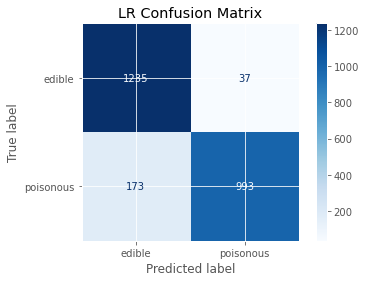

In [81]:
#breakdown the confusion matrix for this classification problem 

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model1, X_test, y_test,
                             display_labels=['edible','poisonous'],
                             cmap=plt.cm.Blues, ax=None)  
plt.title('LR Confusion Matrix')
print(disp.confusion_matrix)

plt.show()

In [82]:
#evaluating metrics calculations from classification report 

from sklearn.metrics import classification_report

y_test_predict_model1 = model1.predict(X_test)
target_names = ['Edible','Poisonous']
cReport = classification_report(y_test, y_test_predict_model1, target_names=target_names)

print('Logistic Regression \n')
print('Evaluation metrics :\n')
print(cReport)

Logistic Regression 

Evaluation metrics :

              precision    recall  f1-score   support

      Edible       0.88      0.97      0.92      1272
   Poisonous       0.96      0.85      0.90      1166

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438



### Graph Visualisation for Logistic Regression

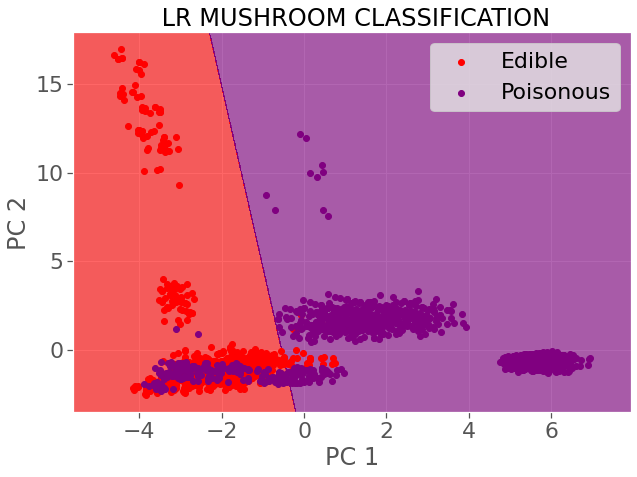

In [83]:
sns.set_context(context='notebook',font_scale=2)
plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)
X_set, y_set = X_test_array, y_test_array
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], color="red", label= "Edible")
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], color="purple", label= "Poisonous")

plt.title(" LR MUSHROOM CLASSIFICATION")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

### Cross Validation for Logistic Regression

In [84]:
#Implementing 5-fold Cross Validation to get the mean ad standard deviation accuracy of this model

from sklearn.model_selection import cross_val_score

res = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print('Logistic Regression \n')
print('Mean Accuracy      : {0:.4f}'.format(res.mean()))
print('Standard Deviation : {0:.4f}'.format(res.std())) 

Logistic Regression 

Mean Accuracy      : 0.8590
Standard Deviation : 0.1233


## KNearest Neighbor Model

In [85]:
#Using K_Nearest Neighbor learning algorithm to create model 

from sklearn.neighbors import KNeighborsClassifier as KNN

model2 = KNN() 
model2.fit(X_train,y_train) #train the data

KNeighborsClassifier()

In [86]:
#predicting the accuracy score for training and testing set 

from sklearn.metrics import accuracy_score

print('KNearest Neighbor \n')
print('Accuracy Score :\n')
print('Training Set : {0:.4f}'.format(accuracy_score(y_train,model2.predict(X_train))))
print('Testing Set  : {0:.4f}'.format(accuracy_score(y_test,model2.predict(X_test))))

KNearest Neighbor 

Accuracy Score :

Training Set : 0.9393
Testing Set  : 0.9340


[[1215   57]
 [ 104 1062]]


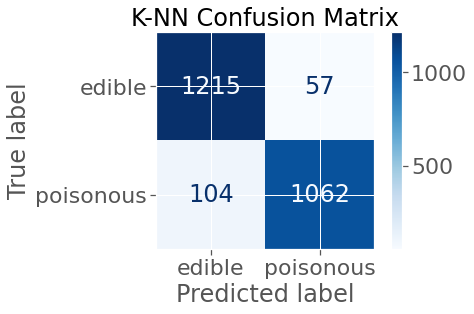

In [87]:
#breakdown the confusion matrix for this classification problem 

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model2, X_test, 
                             y_test,display_labels=['edible','poisonous'], 
                             cmap=plt.cm.Blues, ax=None)  
plt.title('K-NN Confusion Matrix')
print(disp.confusion_matrix)

plt.show()

In [88]:
#evaluating metrics calculations from classification report 

from sklearn.metrics import classification_report

y_test_predict_model2 = model2.predict(X_test)
target_names = ['Edible','Poisonous']
cReport = classification_report(y_test, y_test_predict_model2, target_names=target_names)

print('KNearest Neighbor \n')
print('Evaluation metrics :\n')
print(cReport)

KNearest Neighbor 

Evaluation metrics :

              precision    recall  f1-score   support

      Edible       0.92      0.96      0.94      1272
   Poisonous       0.95      0.91      0.93      1166

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



### Graph Visualisation for KNearest Neighbor 

In [ ]:
sns.set_context(context='notebook',font_scale=2)
plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)
X_set, y_set = X_test_array, y_test_array
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], color="red", label= "Edible")
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], color="purple", label= "Poisonous")

plt.title(" K-NN MUSHROOM CLASSIFICATION")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

## Cross Validation for KNearest Neighbor

In [89]:
#Implementing 5-fold Cross Validation to get the mean and standard deviation accuracy of this model

from sklearn.model_selection import cross_val_score

model3 = KNN()
res = cross_val_score(model3, X, y, cv=5, scoring='accuracy')
print('K-Nearest Neighbor  \n')
print('Mean Accuracy      : {0:.4f}'.format(res.mean()))
print('Standard Deviation : {0:.4f}'.format(res.std())) 

K-Nearest Neighbor  

Mean Accuracy      : 0.8536
Standard Deviation : 0.1171


# Hyperparameter Tuning


## Randomized Search 

In [90]:
n_range = list(range(1,31)) # set a range value of n_neigbor which is from 1 to 31
w_range = ['uniform','distance'] # set weight parameter to 'uniform' and 'distance'

#creating a dictionary to be used in selecting the best hyperparameter 
para_rand = dict(n_neighbors=n_range, weights=w_range)
print(para_rand)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [91]:
#this model will iterate 20 cycles of random parameter with 10 fold cross validation 

model3 = KNN()
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(model3,para_rand, cv=5, 
                          scoring='accuracy',n_iter=20, 
                          random_state=5, return_train_score=False)

rand.fit(X,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [92]:
#Random Search result description

rand.cv_results_

{'mean_fit_time': array([0.01116977, 0.00877519, 0.00896149, 0.00948439, 0.01077108,
        0.00917325, 0.00857539, 0.00877557, 0.00857615, 0.00915856,
        0.00836878, 0.00897603, 0.0090754 , 0.00978155, 0.00817986,
        0.00856957, 0.00857701, 0.00838518, 0.00856199, 0.008741  ]),
 'std_fit_time': array([0.00490444, 0.00074621, 0.00090698, 0.00147887, 0.00230989,
        0.00039895, 0.00048858, 0.000746  , 0.00079704, 0.00074118,
        0.00102101, 0.00063128, 0.00050383, 0.0017134 , 0.00039797,
        0.00080362, 0.0004891 , 0.00048251, 0.00049263, 0.00066384]),
 'mean_score_time': array([0.0143621 , 0.07810888, 0.0760735 , 0.08356824, 0.09394908,
        0.01057553, 0.01483293, 0.07530928, 0.01236739, 0.07402635,
        0.01117883, 0.07320404, 0.00698247, 0.01087317, 0.06827583,
        0.07619619, 0.06233521, 0.01176105, 0.0165803 , 0.07051759]),
 'std_score_time': array([0.00435046, 0.00241228, 0.00173453, 0.01670545, 0.01354802,
        0.00048794, 0.00084406, 0.004517

In [96]:
#convert selected RS result arraylist into dataframe

pd.DataFrame(rand.cv_results_)[["mean_test_score","params"]].head()

,mean_test_score,params
0,0.856453,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.856207,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.856699,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.857191,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.857314,"{'weights': 'uniform', 'n_neighbors': 29}"


In [94]:
#evaluating the best 'mean_test_score' and 'params' used 

print(rand.best_score_)
print(rand.best_params_)

0.8675435392194013
{'weights': 'uniform', 'n_neighbors': 2}


In [97]:
# As Random Search are set with 20 n_iter above, this step will loop nother 10 set of n_iter=20
# This step will find the best score and parameters used among those 20 set of iterations

best_scores = []
best_params = []

for _ in range(10):
    rand = RandomizedSearchCV(model3,para_rand, cv=5, 
                              scoring='accuracy',n_iter=20, random_state=5, 
                              return_train_score=False)
    rand.fit(X,y)
    best_scores.append(rand.best_score_)
    best_params.append(rand.best_params_)

In [ ]:
# Evaluating the best score among 10 set of n_iteration=20

bss = pd.Series(best_scores) 
bps = pd.Series(best_params) 
  
frame = { 'best scores': bss, 'best params': bps } 
  
result = pd.DataFrame(frame)
result

### Visualising The Best Hyperparameter Tuning Score 

In [ ]:
#Analysing accuracy score with i no of nearest neighbors and weight='uniform'

n_range1 = range(1,31) # set a range value of n_neigbors which is from 1 to 31
n_scores1 = [] #store every cross validation scores into an array

for i in n_range1:
    model4 = KNN(n_neighbors = i, weights='uniform')
    scores1 = cross_val_score(model4, X, y, cv=5, scoring='accuracy')
    n_scores1.append(scores1.mean()) #add all mean result in to an array 
print(n_scores1) 

In [ ]:
#Analysing accuracy score with i no of nearest neighbors and weight='distance'

n_range2 = range(1,31) # set a range value of n_neigbors which is from 1 to 31
n_scores2 = [] #store every cross validation scores into an array

for i in n_range2:
    model5 = KNN(n_neighbors = i, weights='distance')
    scores2 = cross_val_score(model5, X, y, cv=5, scoring='accuracy')
    n_scores2.append(scores2.mean()) #add all mean result in to an array 
print(n_scores2) 

In [ ]:
#Visualising the scores into a graph for a better visualisation of defining which hyperparamater 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(100,100))
# Data for plotting
r1 = n_range1
s1 = n_scores1
r2 = n_range2
s2 = n_scores2

fig, ax = plt.subplots()
#plotting for weight='uniform'
ax.plot(r1, s1, color='green', marker='o', linestyle='--', linewidth=2, markersize=5, label="uniform")
#plotting for weight='distance'
ax.plot(r2, s2, color='blue', marker='o', linestyle='--', linewidth=2, markersize=5,label="distance")
ax.legend(fontsize="xx-small")

plt.xlabel('Number of Nearest Neighbors',fontsize='xx-small')
plt.ylabel('Cross Validation Accuracy',fontsize='xx-small')

plt.title("BEST HYPERPARAMETER COMBINATION", fontsize='x-small' )
ax.grid(True, linestyle='--')
ax.tick_params(labelcolor='black', labelsize='xx-small', direction='in', length=10, width=5,grid_alpha=2.0)

plt.show()

# Evaluation

In [ ]:
#From the evaluation of the 2 model (logistic & KNN) that has been trained and implemented with cross validation,
#it shows that, KNearest Neighbor has a higher score in evaluation metrics, confusion matrix and mean accuracy
#In KNearest Neighbor model, hyperparameter tuning has been implemented
#it shows that, the best hyperparameter to be used are n_neighbors=2 and weight='uniform'.

# Model Selection 

## Choosing KNearest Neighbor with hyperparameter tuning 

In [98]:
#Using KNN model with the best hyperparameters and 5-fold cross validation

from sklearn.neighbors import KNeighborsClassifier as KNN

model6 = KNN(n_neighbors=2,weights='uniform')
model6.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [99]:
#predicting the accuracy score for training and testing set 

from sklearn.metrics import accuracy_score

print('KNearest Neighbor \n')
print('Accuracy Score :\n')
print('Training Set : {0:.4f}'.format(accuracy_score(y_train,model6.predict(X_train))))
print('Testing Set  : {0:.4f}'.format(accuracy_score(y_test,model6.predict(X_test))))

KNearest Neighbor 

Accuracy Score :

Training Set : 0.9442
Testing Set  : 0.9233


[[1243   29]
 [ 158 1008]]


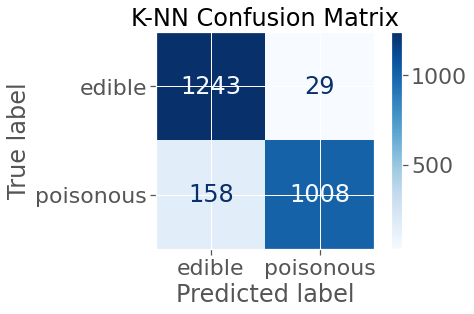

In [100]:
#breakdown the confusion matrix for this classification problem 

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model6, X_test, 
                             y_test,display_labels=['edible','poisonous'], 
                             cmap=plt.cm.Blues, ax=None)  
plt.title('K-NN Confusion Matrix')
print(disp.confusion_matrix)

plt.show()

In [101]:
#evaluating metrics calculations from classification report 

from sklearn.metrics import classification_report

y_test_predict_model6 = model6.predict(X_test)
target_names = ['Edible','Poisonous']
cReport = classification_report(y_test, y_test_predict_model6, target_names=target_names)

print('KNearest Neighbor \n')
print('Evaluation metrics :\n')
print(cReport)

KNearest Neighbor 

Evaluation metrics :

              precision    recall  f1-score   support

      Edible       0.89      0.98      0.93      1272
   Poisonous       0.97      0.86      0.92      1166

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438



In [102]:
#Using KNN model with the best hyperparameters and 5-fold cross validation

from sklearn.neighbors import KNeighborsClassifier as KNN

model6 = KNN(n_neighbors=2,weights='uniform')
model6.fit(X_train,y_train)

res = cross_val_score(model6, X, y, cv=5, scoring='accuracy')

print('KNearest Neighbor \n')
print('Mean Accuracy      : {0:.4f}'.format(res.mean()))
print('Standard Deviation : {0:.4f}'.format(res.std()))

KNearest Neighbor 

Mean Accuracy      : 0.8675
Standard Deviation : 0.0828


In [ ]:
sns.set_context(context='notebook',font_scale=2)
plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)
X_set, y_set = X_test_array, y_test_array
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], color="red", label= "Edible")
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], color="purple", label= "Poisonous")

plt.title("TUNED K-NN MUSHROOM CLASSIFICATION")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()